__________________________________________________________________________________________________________________________________________________________________

# Prediction of arrest for crimes committed in Chicago, Illinois, USA.

__________________________________________________________________________________________________________________________________________________________________

# Table of Contents
- [Loading and Setup](#Loading-and-Setup)
- [Assessment](#Assessment)
- [EDA](#EDA)


__________________________________________________________________________________________________________________________________________________________________

## Loading and Setup <a id ='Loading-and-Setup'></a>

In [3]:
# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm

In [4]:
# reading file 
df = pd.read_csv('/Users/vikst/Desktop/data/Chicago_Crime-cleaned.csv',parse_dates=['Date','Updated On'])

In [5]:
# sanity check
df.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
0,13210088,2023-08-31 12:00:00,023XX W JACKSON BLVD,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,STREET,0,0,1225,12.0,27.0,28.0,11,2023,2023-09-16 15:41:56,41.877565,-87.684791
1,13210004,2023-07-24 21:45:00,073XX S JEFFERY BLVD,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,0,0,333,3.0,7.0,43.0,02,2023,2023-09-16 15:41:56,41.761919,-87.576209
2,13210062,2023-08-27 07:00:00,034XX N LAWNDALE AVE,0820,THEFT,$500 AND UNDER,APARTMENT,0,0,1732,17.0,30.0,21.0,06,2023,2023-09-16 15:41:56,41.943379,-87.719974
3,13210107,2023-09-04 21:30:00,053XX S HOMAN AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE - GARAGE,0,0,822,8.0,14.0,63.0,14,2023,2023-09-16 15:41:56,41.796477,-87.708541
4,13210060,2023-08-15 14:20:00,077XX S SPAULDING AVE,0810,THEFT,OVER $500,RESIDENCE - PORCH / HALLWAY,0,0,835,8.0,18.0,70.0,06,2023,2023-09-16 15:41:56,41.752689,-87.704909


## Assessment <a id ='Assessment'></a>

In [6]:
#gitting shape of data  
df.shape

(620068, 18)

In [7]:
print("The dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))


The dataset has 620068 rows and 18 columns


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620068 entries, 0 to 620067
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    620068 non-null  int64         
 1   Date                  620068 non-null  datetime64[ns]
 2   Block                 620068 non-null  object        
 3   IUCR                  620068 non-null  object        
 4   Primary Type          620068 non-null  object        
 5   Description           620068 non-null  object        
 6   Location Description  620068 non-null  object        
 7   Arrest                620068 non-null  int64         
 8   Domestic              620068 non-null  int64         
 9   Beat                  620068 non-null  int64         
 10  District              620068 non-null  float64       
 11  Ward                  620068 non-null  float64       
 12  Community Area        620068 non-null  float64       
 13 

Findings:

- The DataFrame has been preprocessed to contain 620,068 entries (rows) 
- The DataFrame contains 17 columns, consisting of 10 numerical columns, 13 object (categorical or string) columns and 2 datetime.
- There are no missing values in any of the columns, as the non-null counts for all 17 columns match the total number of entries (620,068)

## EDA <a id = 'EDA'></a>

In [9]:
# Get more detail about dataset variables
df.describe()

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
count,6.200680e+05,620068.000000,620068.000000,620068.000000,620068.000000,620068.000000,620068.000000,620068.000000,620068.000000,620068.000000
mean,1.270603e+07,0.118700,0.202349,1150.618060,11.277023,23.166582,36.657749,2021.969829,41.844399,-87.668891
std,7.668774e+05,0.323435,0.401751,706.455361,7.061034,14.048215,21.574687,0.789448,0.088358,0.060550
min,2.569900e+04,0.000000,0.000000,111.000000,1.000000,1.000000,1.000000,2021.000000,36.619446,-91.686566
25%,1.250597e+07,0.000000,0.000000,533.000000,5.000000,9.000000,22.000000,2021.000000,41.768171,-87.710949
50%,1.275114e+07,0.000000,0.000000,1031.000000,10.000000,24.000000,32.000000,2022.000000,41.860432,-87.662084
75%,1.298404e+07,0.000000,0.000000,1724.000000,17.000000,34.000000,53.000000,2023.000000,41.908448,-87.626471
max,1.322181e+07,1.000000,1.000000,2535.000000,31.000000,50.000000,77.000000,2023.000000,42.022548,-87.524529


#### Primary description of the crime 

In [10]:
# getting unigue value for crime types 
df['Primary Type'].unique()

array(['DECEPTIVE PRACTICE', 'CRIMINAL SEXUAL ASSAULT', 'THEFT',
       'CRIMINAL DAMAGE', 'OFFENSE INVOLVING CHILDREN', 'ROBBERY',
       'SEX OFFENSE', 'OTHER OFFENSE', 'WEAPONS VIOLATION', 'STALKING',
       'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS', 'BATTERY', 'ASSAULT',
       'HOMICIDE', 'PROSTITUTION', 'BURGLARY', 'NARCOTICS', 'ARSON',
       'OBSCENITY', 'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'GAMBLING',
       'HUMAN TRAFFICKING', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL'], dtype=object)

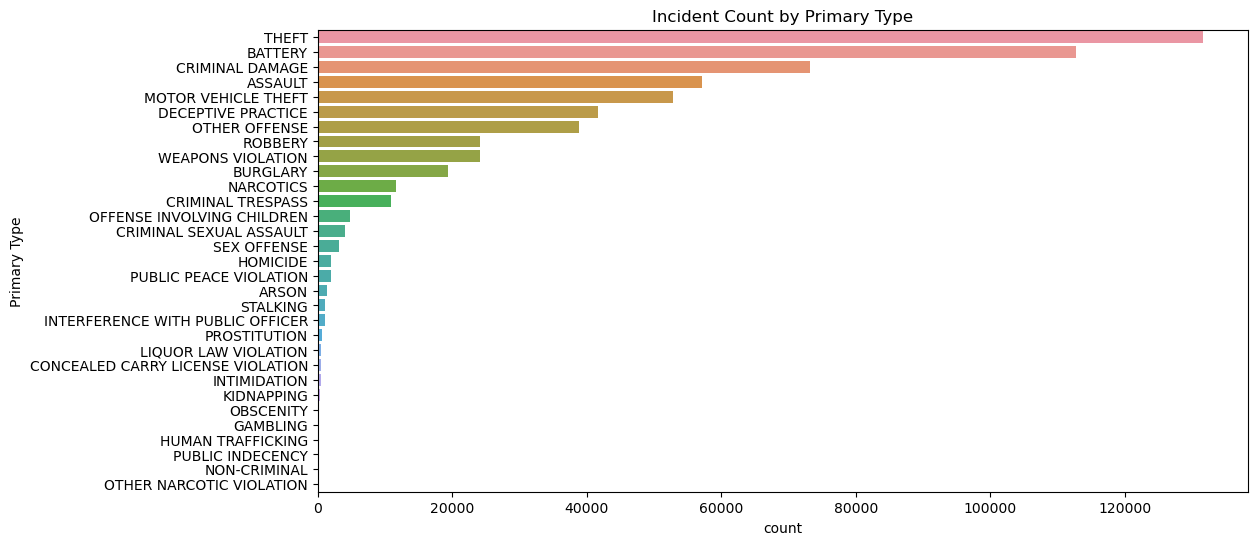

In [11]:
# Visualization
plt.figure(figsize=(12, 6))
sns.countplot(y='Primary Type', data=df, order=df['Primary Type'].value_counts().index)
plt.title('Incident Count by Primary Type')
plt.show()

The countplot illustrates the distribution of different crime categories, displaying the number of occurrences for each type of crime

### Arrests

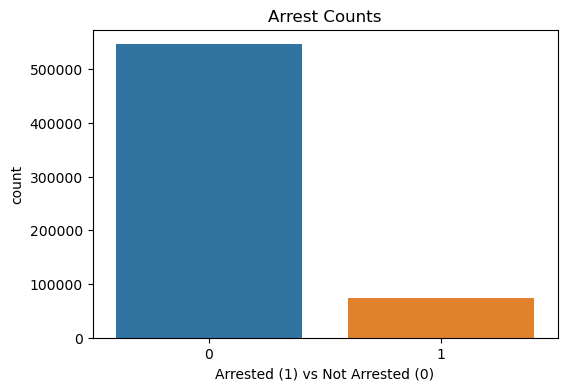

In [12]:
#Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Arrest', data=df)
plt.title('Arrest Counts')
plt.xlabel('Arrested (1) vs Not Arrested (0)')
plt.show()

The countplot visually represents the distribution of arrests (1 for arrested and 0 for not arrested). This visualization helps to understand the balance between arrests and non-arrests in the dataset.

### Domestic crimes

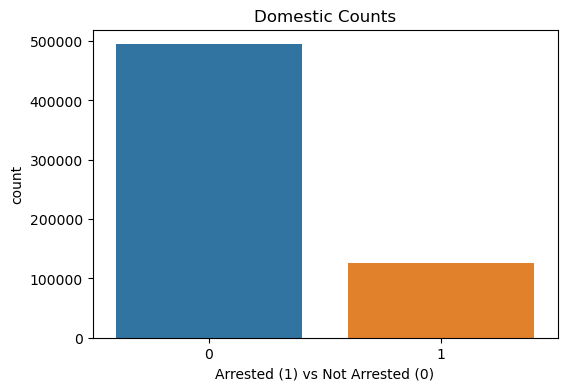

In [13]:
#Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Domestic', data=df)
plt.title('Domestic Counts')
plt.xlabel('Arrested (1) vs Not Arrested (0)')
plt.show()

The countplot displaying the distribution of domestic (1) and non-domestic (0) incidents in the dataset, providing insights into the prevalence of domestic-related incidents compared to non-domestic incidents

### Arrests by District

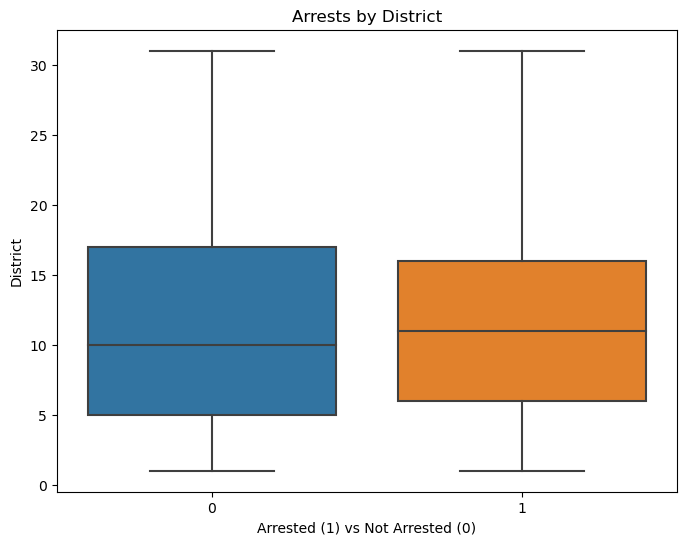

In [14]:
# Boxplot of 'District' vs. 'Arrest'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Arrest', y='District', data=df)
plt.title('Arrests by District')
plt.xlabel('Arrested (1) vs Not Arrested (0)')
plt.show()

The above boxplot provides a visual summary of the distribution and central tendency of 'District' values for arrested and non-arrested incidents, allowing for a comparison between the districts in relation to arrest outcomes.

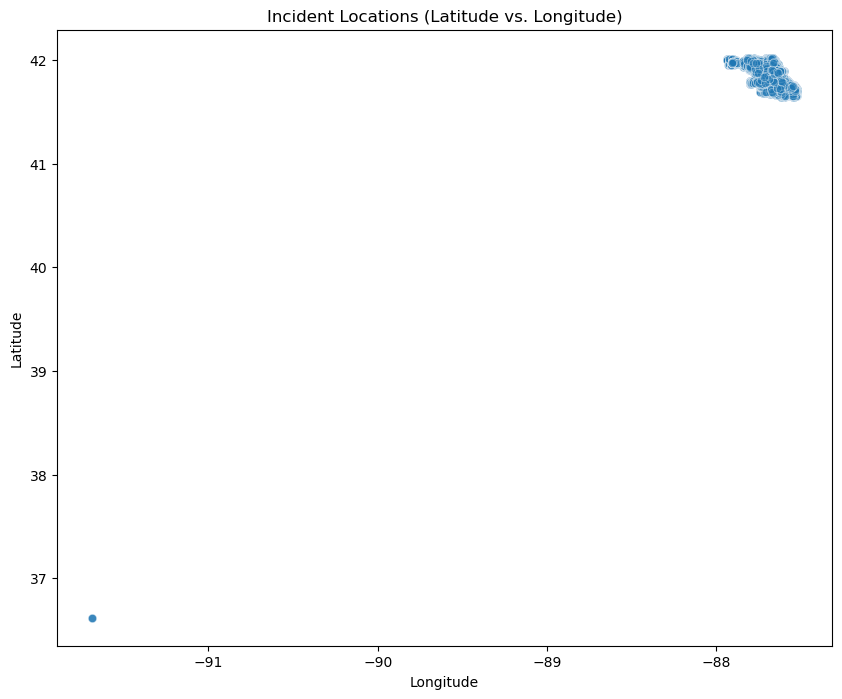

In [15]:
# Scatter plot of Latitude vs. Longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Incident Locations (Latitude vs. Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Based on the above graph, the is an outlier in the lift bottom side of the screen. I want to investigate it further.

In [16]:
#creating a copy of dataframe for investigation 


In [17]:
filtered_df = df[df['Latitude'] < 40]
filtered_df 

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
383199,13013639,2023-03-17 20:12:00,011XX S LAKE SHORE DR W,0453,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,1,0,114,1.0,4.0,32.0,04B,2023,2023-08-11 15:40:15,36.619446,-91.686566
460105,12848210,2022-10-02 19:00:00,001XX W CONGRESS PKWY,0320,ROBBERY,STRONG ARM - NO WEAPON,CTA TRAIN,0,0,122,1.0,4.0,32.0,03,2022,2022-10-09 15:42:58,36.619446,-91.686566
469623,12852880,2022-10-07 15:55:00,0000X E CONGRESS PKWY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,0,0,113,1.0,4.0,32.0,11,2022,2022-10-14 15:41:21,36.619446,-91.686566


Only three rows contain latitude and longitude values that do not align with those of Chicago city. I aim to examine the data associated with these blocks falling outside Chicago city boundaries to identify potential entry error

In [18]:
# Check information for Block 011XX S LAKE SHORE DR W
df_lake = df[df['Block'] == '011XX S LAKE SHORE DR W']
df_lake

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
108571,12415283,2021-07-05 18:00:00,011XX S LAKE SHORE DR W,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),0,0,114,1.0,4.0,32.0,14,2021,2021-07-12 15:40:45,41.868786,-87.617784
149972,12485396,2021-09-17 12:50:00,011XX S LAKE SHORE DR W,0486,BATTERY,DOMESTIC BATTERY SIMPLE,STREET,1,1,114,1.0,4.0,32.0,08B,2021,2021-09-24 15:49:47,41.868876,-87.617691
383199,13013639,2023-03-17 20:12:00,011XX S LAKE SHORE DR W,0453,BATTERY,AGGRAVATED POLICE OFFICER - OTHER DANGEROUS WE...,STREET,1,0,114,1.0,4.0,32.0,04B,2023,2023-08-11 15:40:15,36.619446,-91.686566


The latitude and longitude values for row 383199 are significantly incorrect. I plan to correct these values to match their appropriate counterparts

In [19]:
df.loc[383199, 'Latitude'] = 41.868786
df.loc[383199, 'Longitude'] = -87.617784

In [20]:
#sanity check 
filtered_df = df[df['Latitude'] < 40]
filtered_df 

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
460105,12848210,2022-10-02 19:00:00,001XX W CONGRESS PKWY,0320,ROBBERY,STRONG ARM - NO WEAPON,CTA TRAIN,0,0,122,1.0,4.0,32.0,03,2022,2022-10-09 15:42:58,36.619446,-91.686566
469623,12852880,2022-10-07 15:55:00,0000X E CONGRESS PKWY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,0,0,113,1.0,4.0,32.0,11,2022,2022-10-14 15:41:21,36.619446,-91.686566


In [21]:
# Check information for Block 001XX W CONGRESS PKWY
df_congress = df[df['Block'] == '001XX W CONGRESS PKWY']
df_congress

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
460105,12848210,2022-10-02 19:00:00,001XX W CONGRESS PKWY,0320,ROBBERY,STRONG ARM - NO WEAPON,CTA TRAIN,0,0,122,1.0,4.0,32.0,03,2022,2022-10-09 15:42:58,36.619446,-91.686566


As there is only a single record for this block, I intend to utilize Google to find the Latitude and Longitude coordinates for 100 W Congress Pkwy

In [22]:
df.loc[460105, 'Latitude'] = 41.875938
df.loc[460105, 'Longitude'] = -87.630882

In [23]:
#sanity check 
filtered_df = df[df['Latitude'] < 40]
filtered_df 

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
469623,12852880,2022-10-07 15:55:00,0000X E CONGRESS PKWY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,0,0,113,1.0,4.0,32.0,11,2022,2022-10-14 15:41:21,36.619446,-91.686566


In [24]:
# Check information for Block 0000X E CONGRESS PKWY
df_congress2 = df[df['Block'] == '0000X E CONGRESS PKWY']
df_congress2

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude
469623,12852880,2022-10-07 15:55:00,0000X E CONGRESS PKWY,1150,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,HOTEL / MOTEL,0,0,113,1.0,4.0,32.0,11,2022,2022-10-14 15:41:21,36.619446,-91.686566


As there is only a single record for this block, I intend to utilize Google to find the Latitude and Longitude coordinates for 5 E Congress Pkwy

In [25]:
df.loc[469623, 'Latitude'] = 41.875893
df.loc[469623, 'Longitude'] = -87.627569

In [26]:
#sanity check 
filtered_df = df[df['Latitude'] < 40]
filtered_df 

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Updated On,Latitude,Longitude


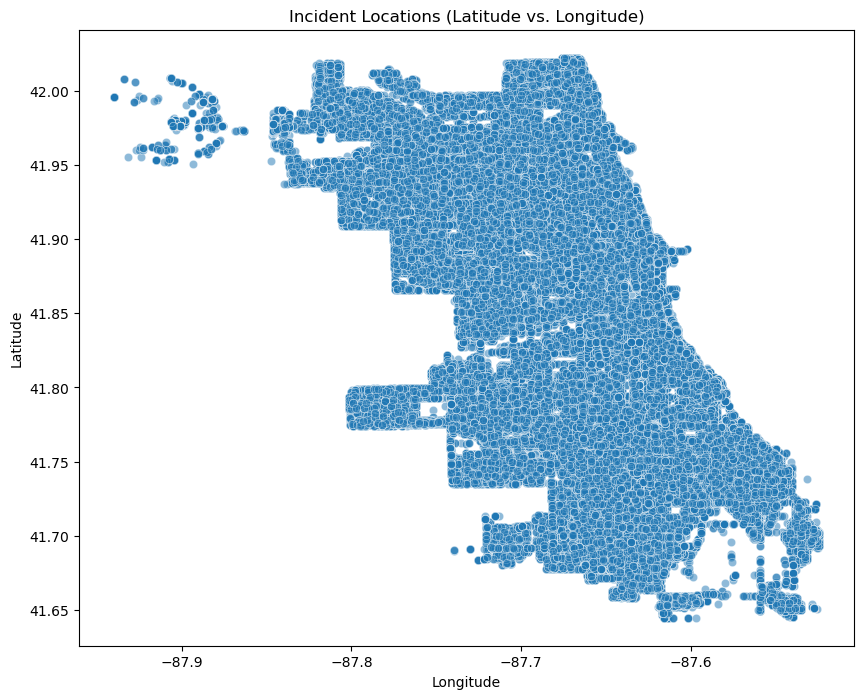

In [27]:
# Reploting Scatter plot of Latitude vs. Longitude after cle
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', data=df, alpha=0.5)
plt.title('Incident Locations (Latitude vs. Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The above  plot provides a geographical overview of incident locations, aiding in understanding the distribution of the recorded incidents across latitude and longitude coordinates.

####  Latitude

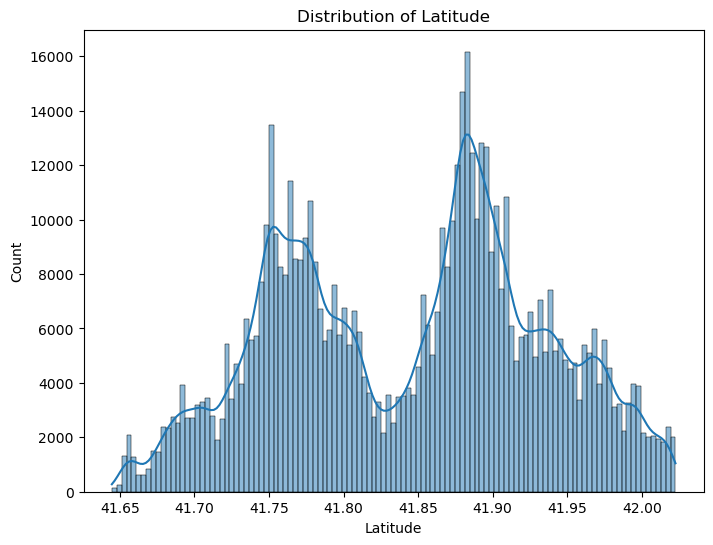

In [28]:
# Distribution of Latitude
plt.figure(figsize=(8, 6))
sns.histplot(df['Latitude'], kde=True)
plt.title('Distribution of Latitude')
plt.xlabel('Latitude')
plt.show()

The above graph likely represents a bimodal distribution.The presence of two peaks suggests that there are two distinct geographical areas where incidents are more concentrated.

### Longitude

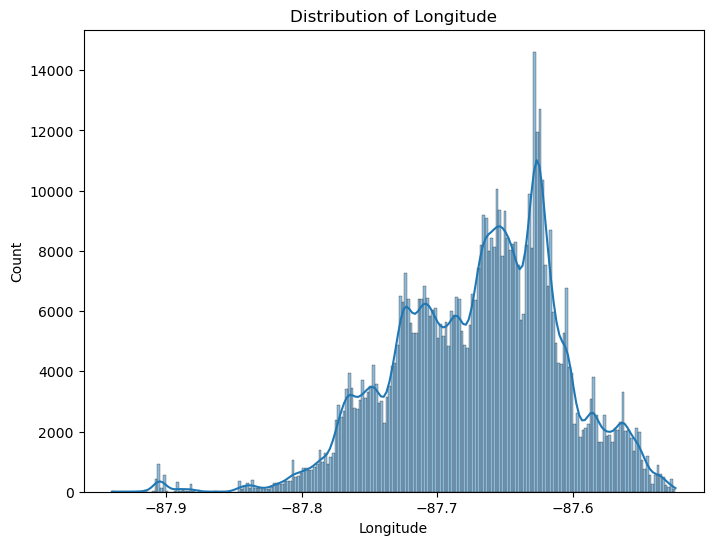

In [29]:
# Distribution of Longitude
plt.figure(figsize=(8, 6))
sns.histplot(df['Longitude'], kde=True)
plt.title('Distribution of Longitude')
plt.xlabel('Longitude')
plt.show()

The above graph is negatively skewed,representing the most common longitude values, and is located towards the smaller longitude values. In other words, the majority of incidents occurred in areas with lower longitude values.

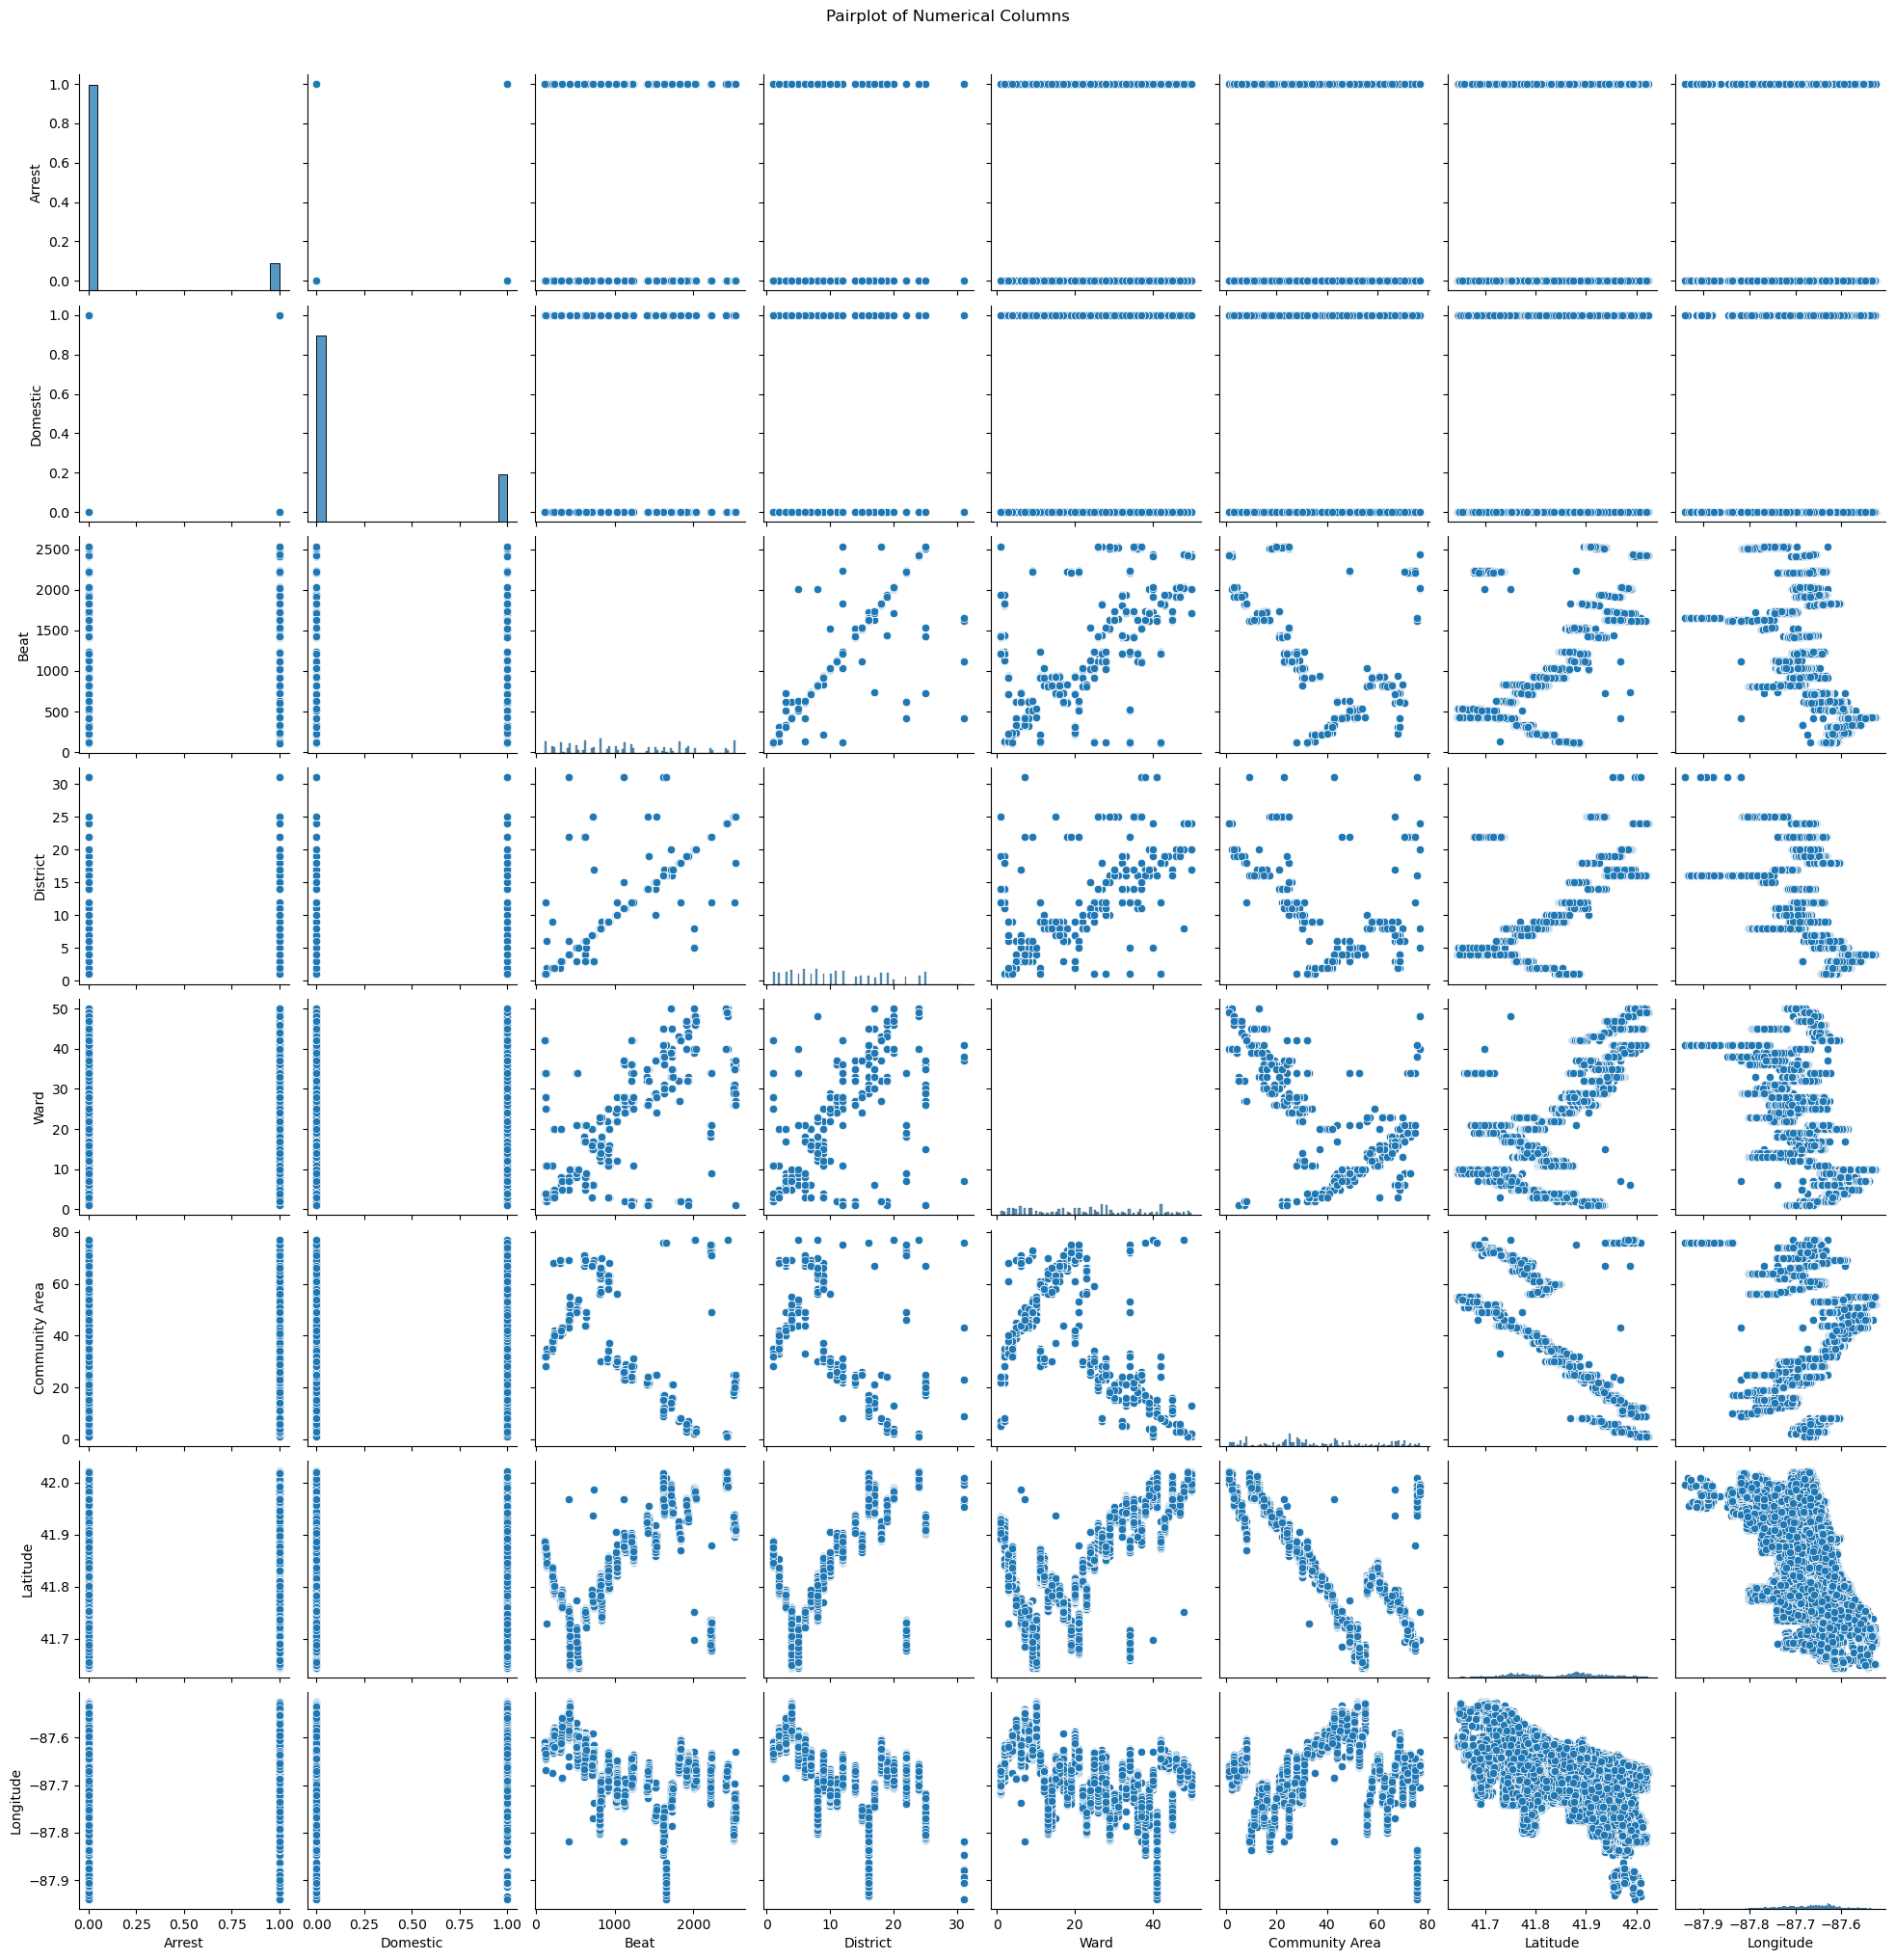

In [30]:
# Pairplot for numerical columns
sns.pairplot(df[['Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude']])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

- Beat has a positive linear relationship with district, ward and latitude. Also negative  linear relationships with community areas.
- District has a positive linear relationship with beat, ward, and latitude. Also, negative linear relationships with community areas.
- Community has a negative linear relationship with beat, district and latitude.


### Exploring relationships between variables

In [31]:
# Check the list of possible predictive column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620068 entries, 0 to 620067
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    620068 non-null  int64         
 1   Date                  620068 non-null  datetime64[ns]
 2   Block                 620068 non-null  object        
 3   IUCR                  620068 non-null  object        
 4   Primary Type          620068 non-null  object        
 5   Description           620068 non-null  object        
 6   Location Description  620068 non-null  object        
 7   Arrest                620068 non-null  int64         
 8   Domestic              620068 non-null  int64         
 9   Beat                  620068 non-null  int64         
 10  District              620068 non-null  float64       
 11  Ward                  620068 non-null  float64       
 12  Community Area        620068 non-null  float64       
 13 

In [32]:
# Save possible predictive column names to list and dependent variable to its own variable

##
x_options=list(df.select_dtypes(include='float'))
y = df['Arrest']

In [33]:
x_options

['District', 'Ward', 'Community Area', 'Latitude', 'Longitude']

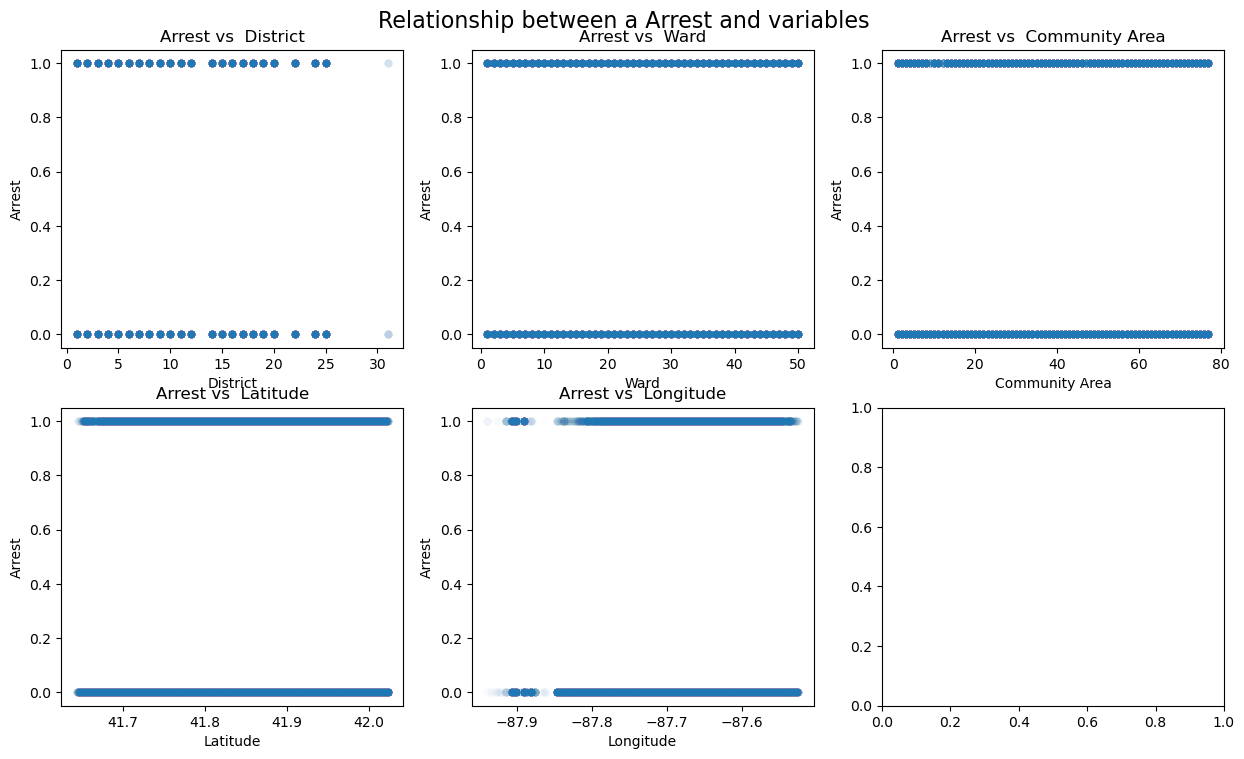

In [34]:
plt.subplots(2,3,figsize=(15,8))

plot_num=1

plt.suptitle("Relationship between a Arrest and variables", fontsize=16)

for col in x_options:

    plt.subplot(2,3,plot_num)
    sns.scatterplot(x=df[col],y=y, alpha=0.01)
    plt.title(f'Arrest vs  {col}')

    plot_num+=1

plt.subplots_adjust(top=0.93)

plt.show()

The graph provided indicates that there is no linear correlation between arrests and the other variables. In light of this observation, I intend to employ logistic regression for this particular model

In [35]:
# creating coorelation matrix
correlation_matrix = df.corr()

In [36]:
#sanity check
correlation_matrix

,ID,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
ID,1.000000,-0.039308,-0.003459,0.015055,0.015075,0.014197,-0.021178,0.347215,0.026002,-0.000275
Arrest,-0.039308,1.000000,0.006724,-0.000219,-0.000300,0.016315,-0.003022,-0.007038,0.008056,-0.042730
Domestic,-0.003459,0.006724,1.000000,-0.067914,-0.067913,-0.086904,0.104471,-0.049417,-0.123506,0.015576
Beat,0.015055,-0.000219,-0.067914,1.000000,0.999713,0.668771,-0.483470,0.000458,0.641381,-0.544804
District,0.015075,-0.000300,-0.067913,0.999713,1.000000,0.669706,-0.483734,0.000415,0.642493,-0.546069
Ward,0.014197,0.016315,-0.086904,0.668771,0.669706,1.000000,-0.523435,-0.000020,0.687567,-0.474515
Community Area,-0.021178,-0.003022,0.104471,-0.483470,-0.483734,-0.523435,1.000000,-0.014339,-0.761461,0.225328
Year,0.347215,-0.007038,-0.049417,0.000458,0.000415,-0.000020,-0.014339,1.000000,0.015950,0.007136
Latitude,0.026002,0.008056,-0.123506,0.641381,0.642493,0.687567,-0.761461,0.015950,1.000000,-0.537251
Longitude,-0.000275,-0.042730,0.015576,-0.544804,-0.546069,-0.474515,0.225328,0.007136,-0.537251,1.000000


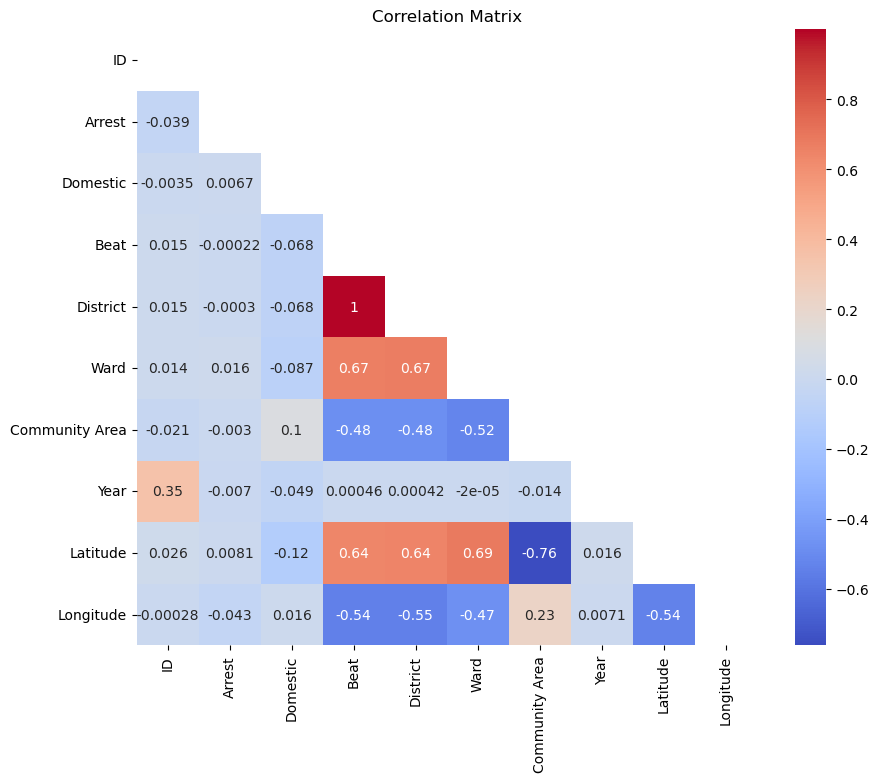

In [38]:
# Plot the correlation matrix as a heatmap

mask = np.triu(correlation_matrix)
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

- District has strong correlation with beat
- Latitude has high negative correlation with community areas
- Latitude has a high positive correlation with beat, district and ward.


### Saving the data

In [39]:
df.to_csv('/Users/vikst/Desktop/data/Chicago_Crime-EDA_cleaned.csv', index=False)